<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Models_EVALS_75%25/Wine_OWA_75_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow  

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y


  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
!pip install tensorflow==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 1.2 MB 67.0 MB/s 
     |████████████████████████████████| 4.0 MB 37.4 MB/s 
     |████████████████████████████████| 462 kB 65.5 MB/s 
     |████████████████████████████████| 14.8 MB 64.8 MB/s 
     |████████████████████████████████| 132 kB 61.9 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68723 sha256=3739076a9350f6a5e234b48d9bdb081951415d53bb353bcb38586105a17f42cc
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existing installation: n

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential

In [2]:
df =  pd.read_csv("https://raw.githubusercontent.com/Noob919/Feature_selection/main/Data/wine_dataset.csv")

Dataset according to Chi Square

In [10]:
rank1 = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "Chi_2").set_index('Attributes_Names')
df_chi =  df[rank1[:9].index]

In [11]:
X_col =  df_chi
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 9)
Shape of testing data (1300, 9)


Random Forest

In [12]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9923076923076923

SVC

In [13]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9976923076923077

ANN

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(9,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 9)                 90        
_________________________________________________________________
batch_normalization_2 (Batch (None, 9)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                120       
_________________________________________________________________
batch_normalization_3 (Batch (None, 12)                48        
_________________________________________________________________
dense_6 (Dense)              (None, 24)                312       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [22]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.7801 - val_loss: 0.2056 - val_accuracy: 0.9546
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1686 - accuracy: 0.9482 - val_loss: 0.0785 - val_accuracy: 0.9700
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9621 - val_loss: 0.0559 - val_accuracy: 0.9792
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9765 - val_loss: 0.0482 - val_accuracy: 0.9815
Epoch 5/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9784 - val_loss: 0.0418 - val_accuracy: 0.9838
Epoch 6/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9790 - val_loss: 0.0383 - val_accuracy: 0.9838
Epoch 7/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9813 - val_loss: 0.0335 - val_accuracy: 0.9885
Epoch 

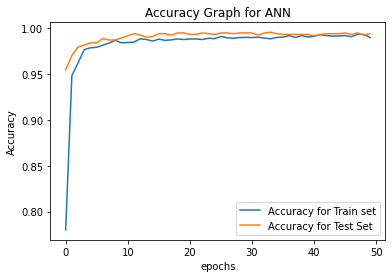

In [23]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

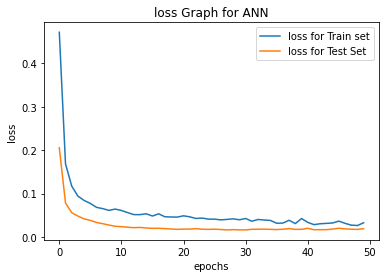

In [24]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [25]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9938461538461538

Tree Method

DataSet according to tree method

In [35]:
rank2  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "Tree_based_method").set_index('Attributes_Names')
df_tree = df[rank2[0:9].index]

In [36]:
X_col =  df_tree
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 9)
Shape of testing data (1300, 9)


Random Forest

In [37]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9953846153846154

In [38]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9984615384615385

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(9,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

In [40]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 9)                 90        
_________________________________________________________________
batch_normalization_6 (Batch (None, 9)                 36        
_________________________________________________________________
dense_13 (Dense)             (None, 12)                120       
_________________________________________________________________
batch_normalization_7 (Batch (None, 12)                48        
_________________________________________________________________
dense_14 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [41]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 0.5012 - accuracy: 0.7643 - val_loss: 0.2534 - val_accuracy: 0.9785
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9659 - val_loss: 0.0473 - val_accuracy: 0.9931
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9835 - val_loss: 0.0240 - val_accuracy: 0.9938
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9860 - val_loss: 0.0188 - val_accuracy: 0.9962
Epoch 5/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9900 - val_loss: 0.0173 - val_accuracy: 0.9962
Epoch 6/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9888 - val_loss: 0.0164 - val_accuracy: 0.9969
Epoch 7/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9896 - val_loss: 0.0162 - val_accuracy: 0.9962
Epoch 

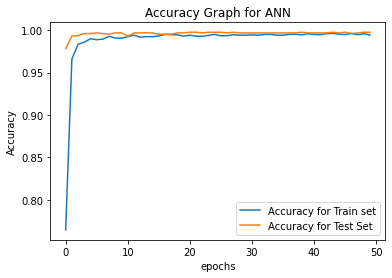

In [42]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

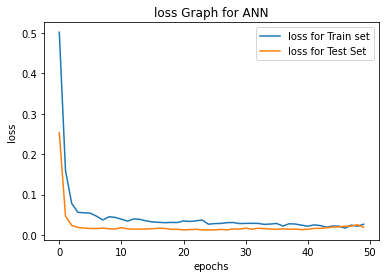

In [43]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [44]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9976923076923077

Permutation Mean Method

In [46]:
rank3  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "permutation_method_mean").set_index('Attributes_Names')
df_per_mean = df[rank3[0:9].index]
X_col =  df_per_mean
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 9)
Shape of testing data (1300, 9)


In [47]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9946153846153846

In [48]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9969230769230769

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(9,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 9)                 90        
_________________________________________________________________
batch_normalization_10 (Batc (None, 9)                 36        
_________________________________________________________________
dense_21 (Dense)             (None, 12)                120       
_________________________________________________________________
batch_normalization_11 (Batc (None, 12)                48        
_________________________________________________________________
dense_22 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_5 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [51]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 3s 6ms/step - loss: 0.4508 - accuracy: 0.7939 - val_loss: 0.2045 - val_accuracy: 0.9731
Epoch 2/50
163/163 [==============================] - 1s 4ms/step - loss: 0.1670 - accuracy: 0.9588 - val_loss: 0.0562 - val_accuracy: 0.9823
Epoch 3/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0992 - accuracy: 0.9756 - val_loss: 0.0361 - val_accuracy: 0.9877
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9783 - val_loss: 0.0307 - val_accuracy: 0.9892
Epoch 5/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9817 - val_loss: 0.0282 - val_accuracy: 0.9908
Epoch 6/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9835 - val_loss: 0.0258 - val_accuracy: 0.9931
Epoch 7/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0610 - accuracy: 0.9829 - val_loss: 0.0240 - val_accuracy: 0.9931
Epoch 

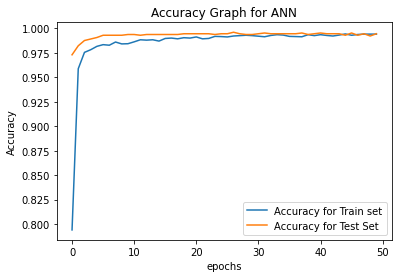

In [52]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

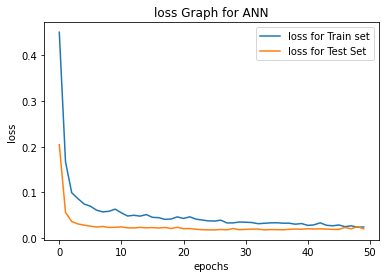

In [53]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [54]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9946153846153846

Permutation Method Standard Deviation

In [55]:
rank4  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "permutation_method_std").set_index('Attributes_Names')
df_per_std  = df[rank4[0:9].index]
X_col =  df_per_std
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 9)
Shape of testing data (1300, 9)


In [56]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9884615384615385

In [57]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9953846153846154

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(9,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 9)                 90        
_________________________________________________________________
batch_normalization_14 (Batc (None, 9)                 36        
_________________________________________________________________
dense_29 (Dense)             (None, 12)                120       
_________________________________________________________________
batch_normalization_15 (Batc (None, 12)                48        
_________________________________________________________________
dense_30 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_7 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                

In [60]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.3963 - accuracy: 0.8457 - val_loss: 0.1943 - val_accuracy: 0.9692
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1450 - accuracy: 0.9617 - val_loss: 0.0584 - val_accuracy: 0.9792
Epoch 3/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.9775 - val_loss: 0.0435 - val_accuracy: 0.9846
Epoch 4/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0788 - accuracy: 0.9817 - val_loss: 0.0349 - val_accuracy: 0.9900
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0796 - accuracy: 0.9808 - val_loss: 0.0336 - val_accuracy: 0.9885
Epoch 6/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0614 - accuracy: 0.9840 - val_loss: 0.0317 - val_accuracy: 0.9923
Epoch 7/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0652 - accuracy: 0.9850 - val_loss: 0.0312 - val_accuracy: 0.9923
Epoch 

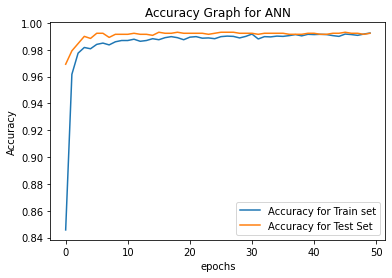

In [61]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

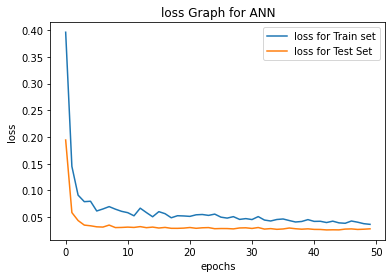

In [62]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [63]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9923076923076923

PCA

In [64]:
rank5  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "PCA").set_index('Attributes_Names')
df_pca  = df[rank5[:6].index]
X_col =  df_pca
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 6)
Shape of testing data (1300, 6)


In [65]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9884615384615385

In [66]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9946153846153846

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_16 (Batc (None, 6)                 24        
_________________________________________________________________
dense_33 (Dense)             (None, 12)                84        
_________________________________________________________________
batch_normalization_17 (Batc (None, 12)                48        
_________________________________________________________________
dense_34 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

In [68]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.5833 - accuracy: 0.6733 - val_loss: 0.3910 - val_accuracy: 0.8400
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8672 - val_loss: 0.2026 - val_accuracy: 0.8962
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9344 - val_loss: 0.1042 - val_accuracy: 0.9692
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.9648 - val_loss: 0.0634 - val_accuracy: 0.9854
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.1018 - accuracy: 0.9744 - val_loss: 0.0468 - val_accuracy: 0.9831
Epoch 6/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.9775 - val_loss: 0.0436 - val_accuracy: 0.9862
Epoch 7/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9788 - val_loss: 0.0415 - val_accuracy: 0.9877
Epoch 

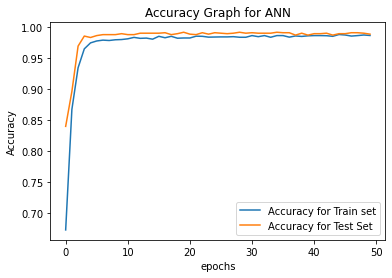

In [69]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

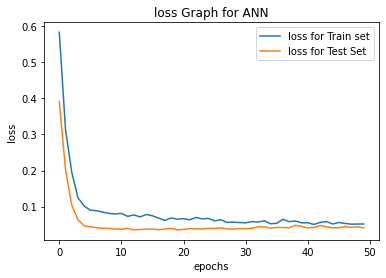

In [70]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [71]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9884615384615385

F Test

In [74]:
rank6  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "F_test").set_index('Attributes_Names')
df_f_test  = df[rank6[:9].index]
X_col =  df_f_test
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 9)
Shape of testing data (1300, 9)


In [75]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9961538461538462

In [76]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9976923076923077

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(9,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 9)                 90        
_________________________________________________________________
batch_normalization_18 (Batc (None, 9)                 36        
_________________________________________________________________
dense_37 (Dense)             (None, 12)                120       
_________________________________________________________________
batch_normalization_19 (Batc (None, 12)                48        
_________________________________________________________________
dense_38 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                

In [78]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.3803 - accuracy: 0.8339 - val_loss: 0.1775 - val_accuracy: 0.9792
Epoch 2/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1327 - accuracy: 0.9692 - val_loss: 0.0431 - val_accuracy: 0.9908
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.9833 - val_loss: 0.0223 - val_accuracy: 0.9931
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9854 - val_loss: 0.0161 - val_accuracy: 0.9969
Epoch 5/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9894 - val_loss: 0.0154 - val_accuracy: 0.9969
Epoch 6/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9865 - val_loss: 0.0143 - val_accuracy: 0.9962
Epoch 7/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9910 - val_loss: 0.0142 - val_accuracy: 0.9946
Epoch 

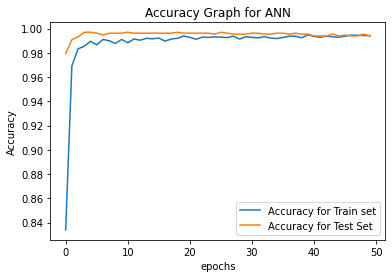

In [79]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

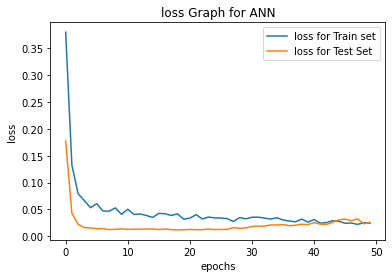

In [80]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [81]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9938461538461538

Mutual Info

In [83]:
rank7  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "mutual_info").set_index('Attributes_Names')
df_mutual = df[rank7[:9].index]
X_col =  df_mutual
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 9)
Shape of testing data (1300, 9)


In [84]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9953846153846154

In [85]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9976923076923077

In [87]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(9,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 9)                 90        
_________________________________________________________________
batch_normalization_22 (Batc (None, 9)                 36        
_________________________________________________________________
dense_45 (Dense)             (None, 12)                120       
_________________________________________________________________
batch_normalization_23 (Batc (None, 12)                48        
_________________________________________________________________
dense_46 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_11 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)               

In [88]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 3s 5ms/step - loss: 0.4626 - accuracy: 0.7955 - val_loss: 0.2283 - val_accuracy: 0.9515
Epoch 2/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1586 - accuracy: 0.9611 - val_loss: 0.0651 - val_accuracy: 0.9838
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9763 - val_loss: 0.0377 - val_accuracy: 0.9869
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9840 - val_loss: 0.0278 - val_accuracy: 0.9931
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0635 - accuracy: 0.9836 - val_loss: 0.0279 - val_accuracy: 0.9915
Epoch 6/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0544 - accuracy: 0.9888 - val_loss: 0.0221 - val_accuracy: 0.9915
Epoch 7/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.9867 - val_loss: 0.0179 - val_accuracy: 0.9923
Epoch 

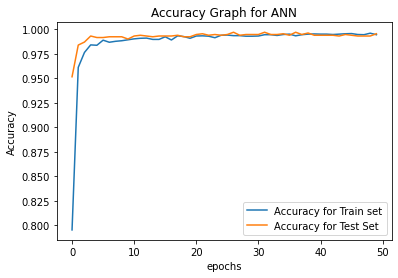

In [89]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

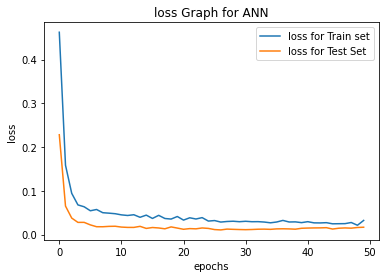

In [90]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [91]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9953846153846154

Pearson

In [92]:
rank8  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "Pearson_Correlation").set_index('Attributes_Names')
df_pearson =  df[rank8[:9].index]
X_col =  df_pearson
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 9)
Shape of testing data (1300, 9)


In [93]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9923076923076923

In [94]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9969230769230769

In [95]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(9,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 9)                 90        
_________________________________________________________________
batch_normalization_24 (Batc (None, 9)                 36        
_________________________________________________________________
dense_49 (Dense)             (None, 12)                120       
_________________________________________________________________
batch_normalization_25 (Batc (None, 12)                48        
_________________________________________________________________
dense_50 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_12 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)               

In [96]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.6128 - accuracy: 0.6475 - val_loss: 0.3775 - val_accuracy: 0.8931
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.9144 - val_loss: 0.1082 - val_accuracy: 0.9738
Epoch 3/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1452 - accuracy: 0.9657 - val_loss: 0.0635 - val_accuracy: 0.9823
Epoch 4/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1135 - accuracy: 0.9723 - val_loss: 0.0507 - val_accuracy: 0.9808
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0909 - accuracy: 0.9781 - val_loss: 0.0442 - val_accuracy: 0.9862
Epoch 6/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.9798 - val_loss: 0.0380 - val_accuracy: 0.9877
Epoch 7/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9840 - val_loss: 0.0350 - val_accuracy: 0.9892
Epoch 

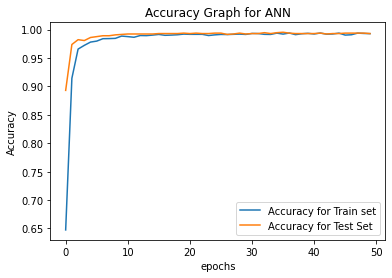

In [97]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

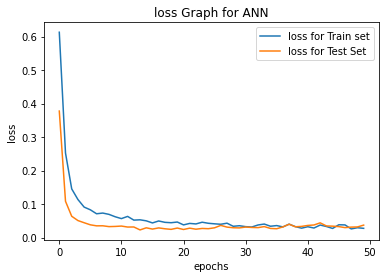

In [98]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [99]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9930769230769231

OWA

In [100]:
df_owa = df[['total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','fixed_acidity','volatile_acidity',
             'sulphates','chlorides','pH','density']]
X_col =  df_owa
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 9)
Shape of testing data (1300, 9)


In [101]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
pred =  rf.predict(X_test)
accuracy_score(y_test,pred)

0.9946153846153846

In [102]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred =  svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9976923076923077

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, activation='relu', input_shape=(9,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

In [104]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 9)                 90        
_________________________________________________________________
batch_normalization_26 (Batc (None, 9)                 36        
_________________________________________________________________
dense_53 (Dense)             (None, 12)                120       
_________________________________________________________________
batch_normalization_27 (Batc (None, 12)                48        
_________________________________________________________________
dense_54 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_13 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 1)               

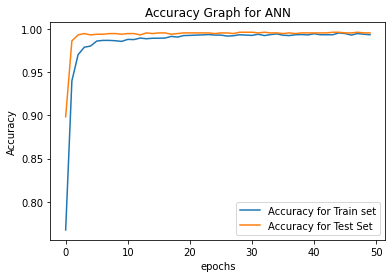

In [105]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

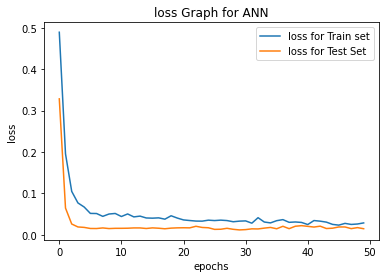

In [106]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [107]:
y_pred_ann_owa = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann_owa)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9953846153846154